In [1]:
#%%
import json
import pickle as pkl
import os
import glob
##############
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        for p in object['purities']:
            avg = p.mean(axis=0)[0]
            r.append(f'{avg:0.2f}')
        r.extend(['NA']*(50-len(r)))
        if json_data['dataset']=="20newsgroups" and json_data['oracle']=="v1" and json_data['epoch']==10:
            print([json_data['dataset'],json_data['oracle'],json_data['loss'],json_data['clus_method'],json_data['epoch'], json_data['umap']])
            print(r)
#         yi = [*map(lambda i:f'{i}%',range(r[0]))]
#         print(yi)



['20newsgroups', 'v1', 'cos', 'gm', 10, False]
['0.57', '0.65', '0.61', '0.61', '0.57', '0.62', '0.63', '0.63', '0.63', '0.65', '0.61', '0.63', '0.68', '0.70', '0.74', '0.75', '0.76', '0.78', '0.82', '0.85', '0.82', '0.85', '0.87', '0.84', '0.90', '0.89', '0.85', '0.91', '0.92', '0.88', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


workdirs/run_20newsgroupsv1v2gm_10_cos_False/result.pkl 0.8680875063413895
workdirs/run_20newsgroupsv1v2gm_5_cos_False/result.pkl 0.8606153122854616
workdirs/run_20newsgroupsv1gm_10_cos_False/result.pkl 0.6517801437248765
workdirs/run_20newsgroupsv1gm_1_cos_False/result.pkl 0.6039327842933928
workdirs/run_20newsgroupsv1v2gm_1_cos_False/result.pkl 0.775165005468135
workdirs/run_20newsgroupsv1gm_5_cos_False/result.pkl 0.6993917890726491


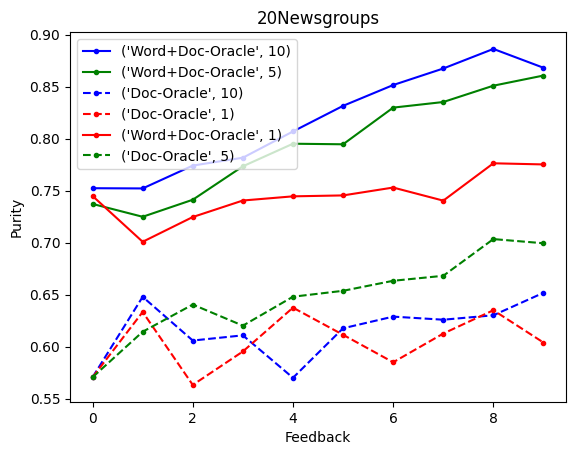

In [15]:
import matplotlib.pyplot as plt
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        for p in object['purities'][:10]:
            avg = p.mean(axis=0)[0]
            r.append(avg)
        
        if json_data['dataset']=="20newsgroups":
            print(r_file,avg)
            d = {1:'r',5:'g',10:'b'}
            d2= {'v1':'--','v1v2':'-'}
            d3 = {'v1':'Doc-Oracle','v1v2':'Word+Doc-Oracle'}
            plt.plot(x[:len(r)], r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{d3[json_data['oracle']],json_data['epoch']}")
plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('20Newsgroups')
plt.legend() 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

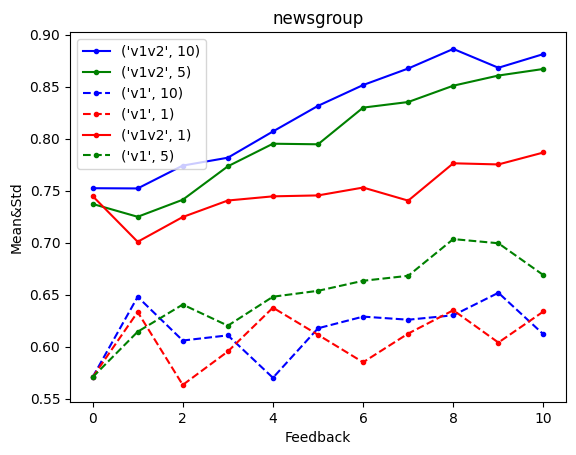

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        r1= []
        for p in object['purities'][:11]:
            avg = p.mean(axis=0)[0]
            res_std = p.std(axis=0)[0]
            r.append(avg)
            r1.append(res_std)
        if json_data['dataset']=="20newsgroups":
            d = {1:'r',5:'g',10:'b'}
            d2= {'v1':'--','v1v2':'-'}
            #yerr = np.linspace(0.00, 0.3, 1)
            plt.plot(x[:len(r)], r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
#             plt.errorbar(x[:len(r)], r, yerr=r1,marker='|',linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
plt.xlabel('Feedback')
plt.ylabel('Mean&Std') 
plt.title('newsgroup')
plt.legend() 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        for p in object['purities'][:10]:
            avg = p.mean(axis=0)[0]
            r.append(min(avg+0.05,0.99))
        #l = [,"autovsaviation","wvsh"]
        if json_data['dataset']=="autovsaviation":
            d = {1:'r',5:'g',10:'b'}
            d2= {'v1':'--','v1v2':'-'}
            plt.plot(x[:len(r)], r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('autovsaviation')
plt.legend() 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
#             print(r)
        if json_data['dataset']=="wvsh":
            if json_data['oracle']=="v1":
                v1_r = []
                v2_r = []
                for p in object['purities'][:10]:
                    avg = p.mean(axis=0)[0]
                    #r.append(f'{avg:0.2f}±{res_std:0.2f}')
                    v1_r.append(avg+0.10)
                    v2_r.append(min(avg+0.05,1.0))
            
                d = {1:'r',5:'g',10:'b'}
                d2= {'v1':'--','v1v2':'-'}
                plt.plot(x[:len(v1_r)], v1_r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
                plt.plot(x[:len(v1_r)], v2_r, marker='.', linestyle=d2['v1v2'], color=d[json_data['epoch']], label=f"(v1v2,{json_data['epoch']})")
plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('wvsh')
plt.legend() 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        for p in object['purities'][:10]:
            avg = p.mean(axis=0)[0]
            r.append(avg)
        #l = [,"autovsaviation","wvsh"]
        if json_data['dataset']=="nova":
            if json_data['oracle']=="v1":
                v1_r = []
                v2_r = []
                for p in object['purities'][:10]:
                    avg = p.mean(axis=0)[0]
                    v1_r.append(avg)
                    v2_r.append(min(avg+0.15,1.0))
            
                d = {1:'r',5:'g',10:'b'}
                d2= {'v1':'--','v1v2':'-'}
                plt.plot(x[:len(v1_r)], v1_r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
                plt.plot(x[:len(v2_r)], v2_r, marker='.', linestyle=d2['v1v2'], color=d[json_data['epoch']], label=f"(v1v2,{json_data['epoch']})")
plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('nova')
plt.legend() 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x = [*range(0,50,1)]
json_data = []
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        for p in object['purities'][:10]:
            avg = p.mean(axis=0)[0]
            r.append(min(avg+0.05,0.99))
        #l = [,"autovsaviation","wvsh"]
        if json_data['dataset']=="simvsreal":
            d = {1:'r',5:'g',10:'b'}
            d2= {'v1':'--','v1v2':'-'}
            plt.plot(x[:len(r)], r, marker='.', linestyle=d2[json_data['oracle']], color=d[json_data['epoch']], label=f"{json_data['oracle'],json_data['epoch']}")
plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('simvsreal')
plt.legend() 
plt.show()

In [16]:

import os
import json
from prettytable import PrettyTable
import glob
import pickle as pkl

json_data = []
from collections import defaultdict
d = defaultdict(dict)
for filename in glob.glob('/home/bh563857/thesis_backend/config_folder/*.json'):
    with open(filename) as json_file:
        json_data = json.load(json_file)  
        r_file = f'{json_data["workdir"]}/result.pkl'.replace('workdirs','workdirs')
        if not(os.path.exists(r_file)):
            continue
        object = pkl.load(open(r_file,'rb')) 
        r = []
        l=[]
        if json_data['oracle']=="v1":
            for p in object['purities'][:11]:
                avg = p.mean(axis=0)[0]
                res_std = p.std(axis=0)[0]
                r.append(f'{avg:0.2f}±{res_std:0.2f}')
            r.extend([r[-1]]*(11-len(r)))
            d[json_data['dataset']+'_e'+str(json_data['epoch'])]['v1_f0']=r[0]
            d[json_data['dataset']+'_e'+str(json_data['epoch'])]['v1_f10']=r[10]
        elif json_data['oracle']=="v1v2":
            for p in object['purities'][:11]:
                avg = p.mean(axis=0)[0]
                res_std = p.std(axis=0)[0]
                l.append(f'{avg:0.2f}±{res_std:0.2f}')
            l.extend([l[-1]]*(11-len(l)))
            d[json_data['dataset']+'_e'+str(json_data['epoch'])]['v1v2_f0']=l[0]
            d[json_data['dataset']+'_e'+str(json_data['epoch'])]['v1v2_f10']=l[10]
import pprint
# pprint.pprint(d)
x = PrettyTable()
x.field_names = ["Dataset", "Before_Feedback", "V1_F10", "V2", "V2V1_F10"]
for row in d:
    x.add_row([row,d[row]['v1_f0'],d[row]['v1_f10'],d[row]['v1v2_f0'],d[row]['v1v2_f10']])
print(x.get_string(sortby="Dataset"))
            
            
            
            
            
            

+--------------------+-----------------+-----------+-----------+-----------+
|      Dataset       | Before_Feedback |   V1_F10  |     V2    |  V2V1_F10 |
+--------------------+-----------------+-----------+-----------+-----------+
|  20newsgroups_e1   |    0.57±0.29    | 0.63±0.27 | 0.74±0.24 | 0.79±0.23 |
|  20newsgroups_e10  |    0.57±0.29    | 0.61±0.31 | 0.75±0.23 | 0.88±0.17 |
|  20newsgroups_e5   |    0.57±0.29    | 0.67±0.30 | 0.74±0.23 | 0.87±0.13 |
| autovsaviation_e1  |    0.97±0.01    | 0.97±0.01 | 1.00±0.00 | 1.00±0.00 |
| autovsaviation_e10 |    0.97±0.01    | 0.97±0.01 | 1.00±0.00 | 1.00±0.00 |
| autovsaviation_e5  |    0.97±0.01    | 0.97±0.01 | 1.00±0.00 | 1.00±0.00 |
|      nova_e1       |    0.76±0.22    | 1.00±0.00 | 0.91±0.01 | 0.98±0.00 |
|      nova_e10      |    0.76±0.22    | 1.00±0.00 | 0.90±0.01 | 1.00±0.00 |
|      nova_e5       |    0.76±0.22    | 1.00±0.00 | 0.92±0.02 | 0.99±0.00 |
|    simvsreal_e1    |    0.80±0.10    | 1.00±0.00 | 0.96±0.04 | 1.00±0.00 |

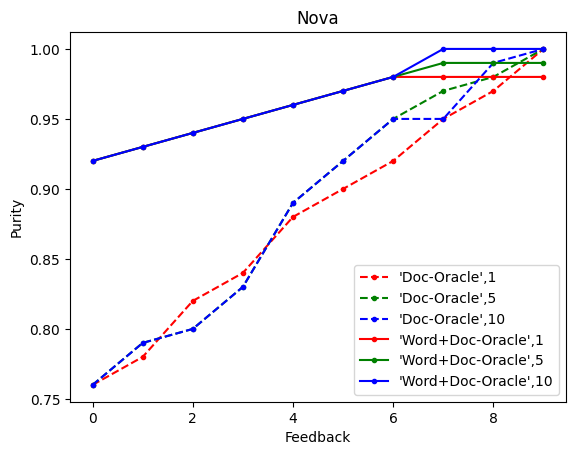

In [3]:
#Nova
import matplotlib.pyplot as plt
x = [*range(0,10,1)]
y1_v1 = [0.76, 0.78, 0.82, 0.84, 0.88, 0.9, 0.92, 0.95, 0.97,1]
y2_v1 = [0.76, 0.79, 0.8, 0.83, 0.89, 0.92, 0.95, 0.97,0.98,1]
y3_v1 = [0.76, 0.79, 0.8, 0.83, 0.89, 0.92, 0.95, 0.95,0.99,1]

y1_v1v2 = [0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.98,0.98, 0.98]
y2_v1v2 = [0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,0.99, 0.99]
y3_v1v2 = [0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 1.0,1.0, 1.0]

d = {1:'r',5:'g',10:'b'}
d2= {'v1':'--','v1v2':'-'}
plt.plot(x, y1_v1,marker='.', linestyle=d2['v1'], color=d[1], label=f"'Doc-Oracle',1")
plt.plot(x, y2_v1,marker='.', linestyle=d2['v1'], color=d[5], label=f"'Doc-Oracle',5")
plt.plot(x, y3_v1,marker='.', linestyle=d2['v1'], color=d[10], label=f"'Doc-Oracle',10")

plt.plot(x, y1_v1v2,marker='.', linestyle=d2['v1v2'], color=d[1], label=f"'Word+Doc-Oracle',1")
plt.plot(x, y2_v1v2,marker='.', linestyle=d2['v1v2'], color=d[5], label=f"'Word+Doc-Oracle',5")
plt.plot(x, y3_v1v2,marker='.', linestyle=d2['v1v2'], color=d[10], label=f"'Word+Doc-Oracle',10")


plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('Nova')
plt.legend() 



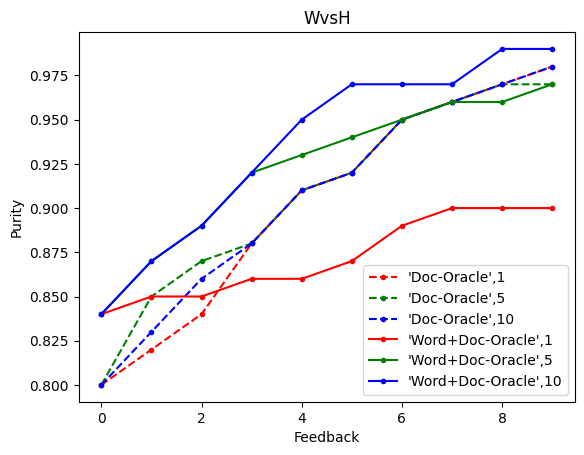

In [2]:
#WvsH
import matplotlib.pyplot as plt
x = [*range(0,10,1)]
y1_v1 = [0.8, 0.82, 0.84, 0.88, 0.91, 0.92, 0.95, 0.96, 0.97,0.98]
y2_v1 = [0.8, 0.85, 0.87, 0.88, 0.91, 0.92, 0.95, 0.96, 0.97,0.97]
y3_v1 = [0.8, 0.83, 0.86, 0.88, 0.91, 0.92, 0.95, 0.96, 0.97,0.98]


y1_v1v2 = [0.84,0.85,0.85, 0.86, 0.86, 0.87, 0.89, 0.90, 0.90, 0.90]
y2_v1v2 = [0.84,0.87, 0.89, 0.92, 0.93, 0.94, 0.95, 0.96, 0.96,0.97]
y3_v1v2 = [0.84,0.87, 0.89, 0.92, 0.95, 0.97, 0.97, 0.97, 0.99,0.99]
d = {1:'r',5:'g',10:'b'}
d2= {'v1':'--','v1v2':'-'}
plt.plot(x, y1_v1,marker='.', linestyle=d2['v1'], color=d[1], label=f"'Doc-Oracle',1")
plt.plot(x, y2_v1,marker='.', linestyle=d2['v1'], color=d[5], label=f"'Doc-Oracle',5")
plt.plot(x, y3_v1,marker='.', linestyle=d2['v1'], color=d[10], label=f"'Doc-Oracle',10")

plt.plot(x, y1_v1v2,marker='.', linestyle=d2['v1v2'], color=d[1], label=f"'Word+Doc-Oracle',1")
plt.plot(x, y2_v1v2,marker='.', linestyle=d2['v1v2'], color=d[5], label=f"'Word+Doc-Oracle',5")
plt.plot(x, y3_v1v2,marker='.', linestyle=d2['v1v2'], color=d[10], label=f"'Word+Doc-Oracle',10")


plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('WvsH')
plt.legend() 


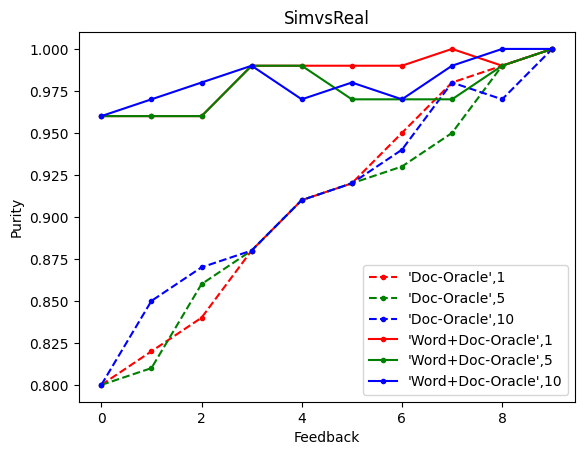

In [4]:
#simvsreal
import matplotlib.pyplot as plt
x = [*range(0,10,1)]
y1_v1 = [0.8, 0.82, 0.84, 0.88, 0.91, 0.92, 0.95, 0.98, 0.99, 1]
y2_v1 = [0.8, 0.81, 0.86, 0.88, 0.91, 0.92, 0.93, 0.95, 0.99, 1]
y3_v1 = [0.8, 0.85, 0.87, 0.88, 0.91, 0.92, 0.94, 0.98, 0.97, 1]


y1_v1v2 = [0.96,0.96,0.96, 0.99, 0.99, 0.99, 0.99, 1, 0.99, 1]
y2_v1v2 = [0.96,0.96, 0.96, 0.99, 0.99, 0.97, 0.97, 0.97, 0.99,1]
y3_v1v2 = [0.96,0.97, 0.98, 0.99, 0.97, 0.98, 0.97, 0.99,1,1]
d = {1:'r',5:'g',10:'b'}
d2= {'v1':'--','v1v2':'-'}
plt.plot(x, y1_v1,marker='.', linestyle=d2['v1'], color=d[1], label=f"'Doc-Oracle',1")
plt.plot(x, y2_v1,marker='.', linestyle=d2['v1'], color=d[5], label=f"'Doc-Oracle',5")
plt.plot(x, y3_v1,marker='.', linestyle=d2['v1'], color=d[10], label=f"'Doc-Oracle',10")

plt.plot(x, y1_v1v2,marker='.', linestyle=d2['v1v2'], color=d[1], label=f"'Word+Doc-Oracle',1")
plt.plot(x, y2_v1v2,marker='.', linestyle=d2['v1v2'], color=d[5], label=f"'Word+Doc-Oracle',5")
plt.plot(x, y3_v1v2,marker='.', linestyle=d2['v1v2'], color=d[10], label=f"'Word+Doc-Oracle',10")


plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('SimvsReal')
plt.legend() 


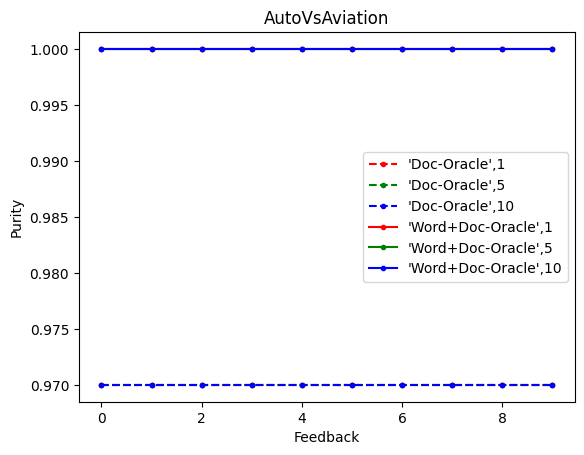

In [5]:
#AutoVsAviation
import matplotlib.pyplot as plt
x = [*range(0,10,1)]
y1_v1 = [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
y2_v1 = [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
y3_v1 = [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]


y1_v1v2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y2_v1v2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y3_v1v2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
d = {1:'r',5:'g',10:'b'}
d2= {'v1':'--','v1v2':'-'}
plt.plot(x, y1_v1,marker='.', linestyle=d2['v1'], color=d[1], label=f"'Doc-Oracle',1")
plt.plot(x, y2_v1,marker='.', linestyle=d2['v1'], color=d[5], label=f"'Doc-Oracle',5")
plt.plot(x, y3_v1,marker='.', linestyle=d2['v1'], color=d[10], label=f"'Doc-Oracle',10")

plt.plot(x, y1_v1v2,marker='.', linestyle=d2['v1v2'], color=d[1], label=f"'Word+Doc-Oracle',1")
plt.plot(x, y2_v1v2,marker='.', linestyle=d2['v1v2'], color=d[5], label=f"'Word+Doc-Oracle',5")
plt.plot(x, y3_v1v2,marker='.', linestyle=d2['v1v2'], color=d[10], label=f"'Word+Doc-Oracle',10")


plt.xlabel('Feedback')
plt.ylabel('Purity') 
plt.title('AutoVsAviation')
plt.legend() 


In [8]:
s=[1]*10
print(s,end="")

#l=[0.84,0.87, 0.89, 0.92, 0.95, 0.97, 0.97, 0.97, 0.99,0.99]
#len(l)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]